In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pyplot
from yellowbrick.target import FeatureCorrelation
from yellowbrick.target.feature_correlation import feature_correlation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import operator

In [2]:
##import the dataset
dataset = pd.read_csv('All.csv')
dataset.shape

(36707, 80)

In [3]:
##change string value to integer according to their type
dataset.loc[dataset["URL_Type_obf_Type"] =='Defacement', "URL_Type_obf_Type"] = 1
dataset.loc[dataset["URL_Type_obf_Type"] =='benign', "URL_Type_obf_Type"] = 0
dataset.loc[dataset["URL_Type_obf_Type"] =='phishing', "URL_Type_obf_Type"] = 2
dataset.loc[dataset["URL_Type_obf_Type"] =='malware', "URL_Type_obf_Type"] = 3
dataset.loc[dataset["URL_Type_obf_Type"] =='spam', "URL_Type_obf_Type"] = 4
dataset = pd.DataFrame(dataset)
##delete nan value
dataset.dropna(inplace = True)

In [4]:
x = dataset.iloc[:, 0:79].values
y = dataset.iloc[:, 79].values
y=y.astype('int')

In [5]:
model = RandomForestRegressor()

In [6]:
model.fit(x, y)

RandomForestRegressor()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred =np.round(y_pred,0)
score = accuracy_score(y_test, y_pred)

In [8]:
print(score)

0.9357387411114038


In [10]:
importance = model.feature_importances_
importance

array([6.68921049e-04, 1.08483645e-01, 4.36576447e-03, 1.34812233e-02,
       1.90315401e-02, 1.91497915e-02, 8.90622868e-02, 3.53926448e-03,
       2.74782921e-03, 2.44678938e-03, 5.62396935e-04, 2.07523154e-03,
       3.79614121e-04, 1.71783586e-03, 3.47643775e-04, 4.39417676e-06,
       2.94993024e-04, 8.64082110e-05, 7.34324419e-05, 2.10272805e-02,
       1.53789199e-02, 3.75330495e-03, 3.11447633e-03, 2.51716595e-02,
       1.14497140e-02, 5.84556325e-04, 3.74093884e-03, 3.85792392e-03,
       1.78625349e-02, 8.58343868e-03, 1.84623655e-03, 3.24051675e-03,
       1.38256240e-04, 6.86249575e-06, 2.52485440e-03, 0.00000000e+00,
       9.68703390e-03, 3.04815373e-03, 1.69393451e-03, 1.12885707e-03,
       1.66332853e-03, 3.21324802e-03, 1.00321173e-02, 5.19905729e-04,
       9.41082636e-03, 3.00317780e-02, 2.79080599e-02, 6.47627228e-03,
       9.21861326e-03, 4.80999586e-04, 3.45539233e-02, 3.55502603e-03,
       3.38858424e-03, 6.10979213e-03, 2.13971448e-03, 1.72348243e-04,
      

Feature: 0, Score: 0.00067
Feature: 1, Score: 0.10848
Feature: 2, Score: 0.00437
Feature: 3, Score: 0.01348
Feature: 4, Score: 0.01903
Feature: 5, Score: 0.01915
Feature: 6, Score: 0.08906
Feature: 7, Score: 0.00354
Feature: 8, Score: 0.00275
Feature: 9, Score: 0.00245
Feature: 10, Score: 0.00056
Feature: 11, Score: 0.00208
Feature: 12, Score: 0.00038
Feature: 13, Score: 0.00172
Feature: 14, Score: 0.00035
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00029
Feature: 17, Score: 0.00009
Feature: 18, Score: 0.00007
Feature: 19, Score: 0.02103
Feature: 20, Score: 0.01538
Feature: 21, Score: 0.00375
Feature: 22, Score: 0.00311
Feature: 23, Score: 0.02517
Feature: 24, Score: 0.01145
Feature: 25, Score: 0.00058
Feature: 26, Score: 0.00374
Feature: 27, Score: 0.00386
Feature: 28, Score: 0.01786
Feature: 29, Score: 0.00858
Feature: 30, Score: 0.00185
Feature: 31, Score: 0.00324
Feature: 32, Score: 0.00014
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00252
Feature: 35, Score: 0.00000
Fe

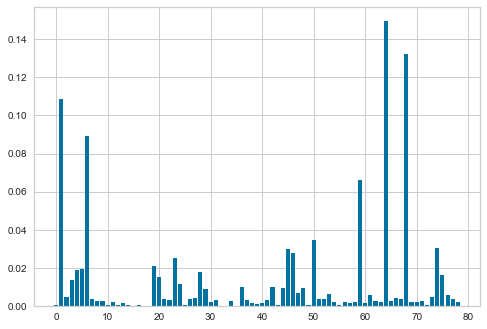

In [11]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [12]:
sort_importance = np.sort(importance)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00007
Feature: 4, Score: 0.00009
Feature: 5, Score: 0.00014
Feature: 6, Score: 0.00017
Feature: 7, Score: 0.00029
Feature: 8, Score: 0.00035
Feature: 9, Score: 0.00038
Feature: 10, Score: 0.00048
Feature: 11, Score: 0.00052
Feature: 12, Score: 0.00056
Feature: 13, Score: 0.00058
Feature: 14, Score: 0.00063
Feature: 15, Score: 0.00067
Feature: 16, Score: 0.00113
Feature: 17, Score: 0.00150
Feature: 18, Score: 0.00166
Feature: 19, Score: 0.00169
Feature: 20, Score: 0.00170
Feature: 21, Score: 0.00172
Feature: 22, Score: 0.00183
Feature: 23, Score: 0.00185
Feature: 24, Score: 0.00189
Feature: 25, Score: 0.00193
Feature: 26, Score: 0.00199
Feature: 27, Score: 0.00200
Feature: 28, Score: 0.00206
Feature: 29, Score: 0.00208
Feature: 30, Score: 0.00214
Feature: 31, Score: 0.00229
Feature: 32, Score: 0.00245
Feature: 33, Score: 0.00245
Feature: 34, Score: 0.00252
Feature: 35, Score: 0.00252
Fe

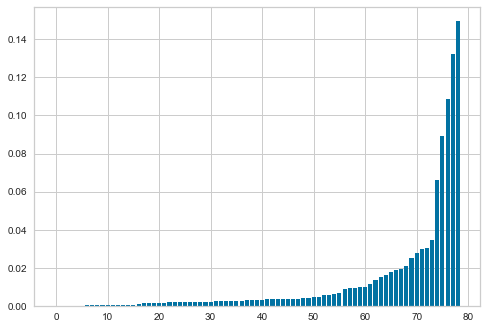

In [13]:
for i,v in enumerate(sort_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], sort_importance)
pyplot.show()

In [15]:
##convert numpy to dict
d = dict(enumerate(importance, 0)) 

In [16]:
##sorted by value
sorted_d = sorted(d.items(), key=operator.itemgetter(1))
sorted_d 

[(35, 0.0),
 (15, 4.394176756821949e-06),
 (33, 6.8624957511726705e-06),
 (18, 7.343244191490855e-05),
 (17, 8.640821098057179e-05),
 (32, 0.00013825623996308403),
 (55, 0.0001723482434412342),
 (16, 0.00029499302401078843),
 (14, 0.0003476437754874385),
 (12, 0.00037961412146003356),
 (49, 0.0004809995864047298),
 (43, 0.0005199057287729804),
 (10, 0.0005623969352229736),
 (25, 0.0005845563248504307),
 (72, 0.0006285680477733408),
 (0, 0.000668921049389082),
 (39, 0.0011288570748944687),
 (57, 0.0015009388680019874),
 (40, 0.0016633285324177355),
 (38, 0.0016939345053391473),
 (60, 0.0017010177296546288),
 (13, 0.0017178358648238343),
 (69, 0.0018310991231546053),
 (30, 0.0018462365547540426),
 (56, 0.001890972457036888),
 (70, 0.0019252891931917195),
 (78, 0.0019855384099142087),
 (58, 0.001997521646823661),
 (63, 0.0020581508153682164),
 (11, 0.0020752315427488084),
 (54, 0.002139714481593322),
 (71, 0.0022851815708485406),
 (9, 0.0024467893825417964),
 (65, 0.002453130040669259),
 

In [17]:
dataset
print(dataset.shape)

(18982, 80)


In [18]:
dataset.drop([dataset.columns[35],dataset.columns[15],dataset.columns[33],dataset.columns[17],dataset.columns[18]], axis=1,inplace=True)

print(dataset.shape)

(18982, 75)


In [19]:
x = dataset.iloc[:, 0:74].values
y = dataset.iloc[:, 74].values
y=y.astype('int')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred =np.round(y_pred,0)
score1 = accuracy_score(y_test, y_pred)

In [21]:
print(score1)

0.9367922043718725


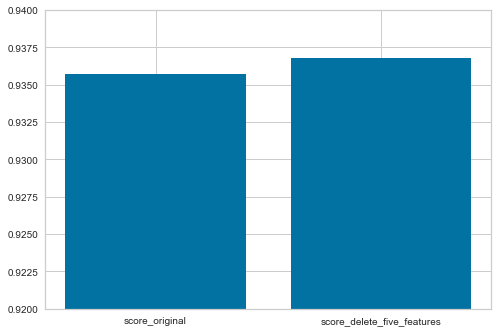

In [24]:
a=['score_original', 'score_delete_five_features']
b=[score,score1]
pyplot.ylim(0.92, 0.94)
pyplot.bar(a,b)
pyplot.show()

conclusion: with deleting 5 least related features, the score gets higher.

In [26]:
dataset.shape

(18982, 75)

In [28]:
model.fit(x, y)


RandomForestRegressor()

In [29]:
importance = model.feature_importances_
d = dict(enumerate(importance, 0)) 
sorted_d = sorted(d.items(), key=operator.itemgetter(1))
sorted_d 

[(29, 0.00013419480399902287),
 (50, 0.00021227277890033188),
 (15, 0.0003561021265976686),
 (14, 0.00035978411826148864),
 (12, 0.00046160820635092616),
 (38, 0.00048331017030364795),
 (44, 0.0005344583150329167),
 (10, 0.000610601558638127),
 (0, 0.0006143233933578441),
 (67, 0.0006540346202416702),
 (22, 0.0007518249110666009),
 (34, 0.0009281471377453194),
 (35, 0.0014757509662876754),
 (51, 0.001563120205600994),
 (52, 0.0016281437205600269),
 (33, 0.0017205176967578875),
 (73, 0.001736768004526324),
 (13, 0.0017959237862245504),
 (11, 0.001883189844330324),
 (53, 0.0019250377259738974),
 (58, 0.0019879728008409064),
 (64, 0.0020175061768710847),
 (55, 0.0020751776226846964),
 (66, 0.0021094917639741264),
 (30, 0.0021293074767508705),
 (60, 0.0022122876878959206),
 (49, 0.002215945413639132),
 (27, 0.0023449871009823906),
 (57, 0.0024749694359081378),
 (32, 0.002526895970058206),
 (65, 0.0027505622068794556),
 (8, 0.0028133824259413904),
 (47, 0.0029132725003134462),
 (9, 0.002927

In [30]:
dataset.drop([dataset.columns[29],dataset.columns[50],dataset.columns[15],dataset.columns[14],dataset.columns[12]], axis=1,inplace=True)

print(dataset.shape)

(18982, 70)


In [31]:
x = dataset.iloc[:, 0:69].values
y = dataset.iloc[:, 69].values
y=y.astype('int')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred =np.round(y_pred,0)
score2 = accuracy_score(y_test, y_pred)
print(score2)

0.9336318145904662


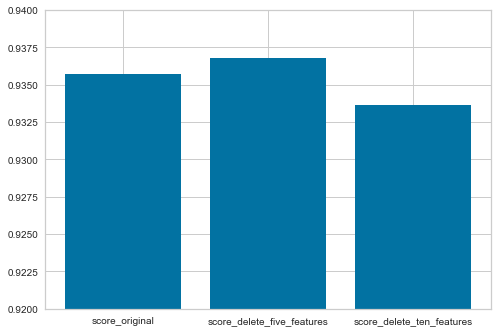

In [33]:
a=['score_original', 'score_delete_five_features','score_delete_ten_features']
b=[score,score1,score2]
pyplot.ylim(0.92, 0.94)
pyplot.bar(a,b)
pyplot.show()

conclusion: with deleting 5 least related features, the score gets higher.
with deleting 10 least related features, the score gets lower.